# VERZEO MAJOR PROJECT

PROBLEM STATEMENT: Problem Statement : For a given dataset (problem) which is the best classification algorithm (as per accuracy)

Pick up a dataset of your choice or the one attached with mail (Preferable) 

Ask any two questions on the dataset of your choice and provide answers for the same. 

Take up three classification algorithms of your own choice and build three respective Machine learning models. Compare the Accuracy of all three and suggest which ML algorithms suits best for the given problem.

# ANALYSIS

The Dataset given titled 'Information.csv' shows the tweet written by different twitter users and analysis is done in order to classify the tweeting habits of male and female users respectively. All the user data whose gender has not been specified will not be considered for analysis. 

Also note that 'Gender' is the target variable here. 

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Information.csv', encoding='latin-1')
df=pd.DataFrame(df)

In [5]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [6]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

# Feature Selection 

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

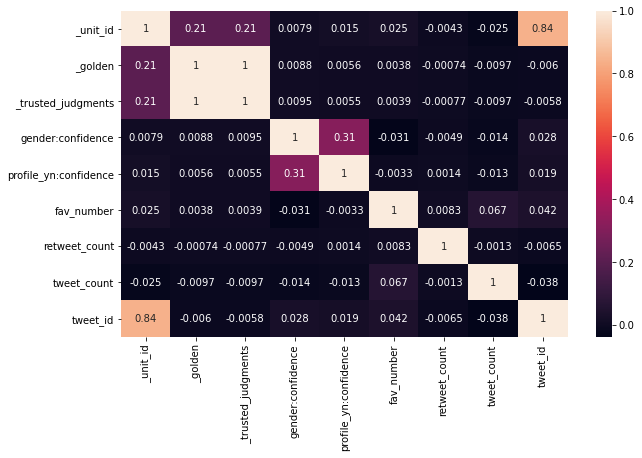

In [9]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True)

The above heatmap showcases the correlation between the numerical values which helps in choosing the features for further analysis.

Conclusions from the heatmap --

profile:confidence and gender confidence show some correlations so we took profile_yn as our feature.
We eliminated unit_id and tweet_id from our dataframe as this doesnot make any sense.
We included text and description columns as part of our analysis since it could be useful for natural language processing analysis for machine learning.
Columns are selected as they are used to predict the gender column which is the target attribute.

In [10]:
df = df[['_unit_id','name','gender','gender:confidence','profile_yn','profile_yn:confidence','description','text']]

From above we have drawn some conclusions:

--> Attributes that do not provide useful information for Gender classification:

1. _unit_id: a unique id for user
2. _last_judgment_at: date and time of last contributor judgment; blank for gold standard observations
3. user_timezone: the timezone of the user
4. tweet_coord: if the user has location turned on, the coordinates as a string with the format "[latitude, longitude]"
5. tweet_created: when the random tweet (in the text column) was created
6. tweet_id: the tweet id of the random tweet
7. tweet_location: location of the tweet; seems to not be particularly normalized
8. profileimage: a link to the profile image
9. created: date and time when the profile was created


--> Attributes that potentially provide useful information for Gender classification:

1. _golden: whether the user was included in the gold standard for the model; TRUE or FALSE
2. _unit_state: state of the observation; one of finalized (for contributor-judged) or golden (for gold standard observations)
3. _trusted_judgments: number of trusted judgments (int); always 3 for non-golden, and what may be a unique id for gold standard observations
4. gender: one of male, female, or brand (for non-human profiles)
5. gender:confidence: a float representing confidence in the provided gender
6. gender_gold: if the profile is golden, what is the gender?
7. profile_yn: "no" here seems to mean that the profile was meant to be part of the dataset but was not available when contributors went to judge it
8. profile_yn:confidence: confidence in the existence/non-existence of the profile
9. profile_yn_gold: whether the profile y/n value is golden
10. description: the user's profile description
11. fav_number: number of tweets the user has favorited
12. link_color: the link color on the profile, as a hex value
13. name: the user's name
14. retweet_count: number of times the user has retweeted (or possibly, been retweeted)
15. sidebar_color: color of the profile sidebar, as a hex value
16. text: text of a random one of the user's tweets
17. tweet_count: number of tweets that the user has posted

In [11]:
df.head()

,_unit_id,name,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text
0,815719226,sheezy0,male,1.0000,yes,1.0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...
1,815719227,DavdBurnett,male,1.0000,yes,1.0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...
2,815719228,lwtprettylaugh,male,0.6625,yes,1.0,louis whining and squealing and all,i absolutely adore when louis starts the songs...
3,815719229,douggarland,male,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...
4,815719230,WilfordGemma,female,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...


In [12]:
#Box plot used for data visualosation
import seaborn as sns

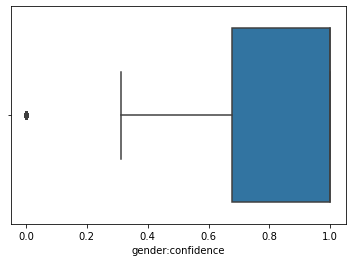

In [13]:
sns.boxplot(df['gender:confidence'])

In [14]:
df = df[(df['profile_yn:confidence'] >= 0.6) | (df['gender:confidence'] >= 0.6)]

Profile_yn: Confidence having values greater than and equal to 0.6 are selected as this shows the confidence in the existence of the user's profile which might help us improve the quality of the dataset. Similarly for gender:confidence >= 0.6 is selected.

In [15]:
df.gender.unique()

array(['male', 'female', 'brand', 'unknown', nan], dtype=object)

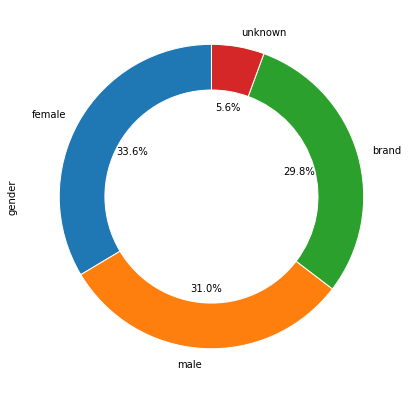

In [16]:
plt.figure(figsize=(7,7))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                  startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'))
plt.show()

Gender has values such as male, female, brand and unknown. For this prediction model only male and female gender values are used.

In [17]:
df = df[(df['gender'] == 'male') | (df['gender'] == 'female')]

In [18]:
df.profile_yn.unique()

array(['yes'], dtype=object)

In [19]:
df = df[df['profile_yn'] == 'yes']

# NULL VALUES 

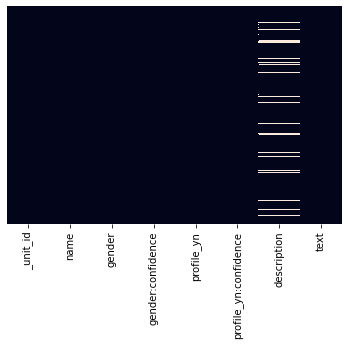

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar = False)

In [21]:
df = df.dropna()

In [22]:
df.shape

(11194, 8)

After cleaning the dataset is reduced from 20050 rows to 11194 rows and from 26 columns to 7 columns

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11194 entries, 0 to 20049
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               11194 non-null  int64  
 1   name                   11194 non-null  object 
 2   gender                 11194 non-null  object 
 3   gender:confidence      11194 non-null  float64
 4   profile_yn             11194 non-null  object 
 5   profile_yn:confidence  11194 non-null  float64
 6   description            11194 non-null  object 
 7   text                   11194 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 787.1+ KB


In [24]:
df['text_description'] = df['text'].str.cat(df['description'], sep=' ')

Text and description columns are here combined to add an extra layer of text data for classifying the gender based on the texting habits of the Twitter user.

In [25]:
df.head()

,_unit_id,name,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text,text_description
0,815719226,sheezy0,male,1.0000,yes,1.0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,Robbie E Responds To Critics After Win Against...
1,815719227,DavdBurnett,male,1.0000,yes,1.0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,ÛÏIt felt like they were my friends and I was...
2,815719228,lwtprettylaugh,male,0.6625,yes,1.0,louis whining and squealing and all,i absolutely adore when louis starts the songs...,i absolutely adore when louis starts the songs...
3,815719229,douggarland,male,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,Hi @JordanSpieth - Looking at the url - do you...
4,815719230,WilfordGemma,female,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,Watching Neighbours on Sky+ catching up with t...


In [26]:
#The individual text and description columns are dropped after combining the two text fields into one
df= df.drop(['description','text'],axis=1)

In [27]:
df=df.reset_index(drop=True)

Furture cleaning of text_description column is done below to remove the unwanted characters

In [28]:
import re
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = s.replace(",","")
    s = re.sub('[!@#$_]', '', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = s.replace('','')
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace("http","")
    s = re.sub("[^a-zA-z]", " ",s)
    return s

df['text_description'] = [cleaning(s) for s in df['text_description']]
df.head()

,_unit_id,name,gender,gender:confidence,profile_yn,profile_yn:confidence,text_description
0,815719226,sheezy0,male,1.0000,yes,1.0,robbie e responds to critics after win against...
1,815719227,DavdBurnett,male,1.0000,yes,1.0,it felt like they were my friends and i was...
2,815719228,lwtprettylaugh,male,0.6625,yes,1.0,i absolutely adore when louis starts the songs...
3,815719229,douggarland,male,1.0000,yes,1.0,hi jordanspieth looking at the url do you ...
4,815719230,WilfordGemma,female,1.0000,yes,1.0,watching neighbours on sky catching up with t...


# Q1) What are the most common emotions/words used by Males and Females?

In order to solve the above question two counters are created each for male and female. Male counter contains the words used by males and the number of times that particular word is used while the same is done for females.These counters contain the stopwords which are removed and the answers are found based on the filtered words.

In [32]:
from collections import Counter
wordsM = Counter()
wordsF = Counter()
for twit,gender in zip(df['text_description'],df['gender']):
    if gender == 'male':
        for x in twit.split(' '):
            wordsM[x] += 1
    else:
        for x in twit.split(' '):
            wordsF[x] += 1

wordsF.most_common(5)

[('', 59628), ('and', 5707), ('the', 5496), ('i', 4951), ('t', 3052)]

In [33]:
wordsM.most_common(5)

[('', 51892), ('the', 6044), ('and', 5278), ('i', 3817), ('t', 3130)]

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Muskaan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
words_filteredM = Counter()
words_filteredF = Counter()
for x, y in wordsM.items():
    if not x in stopwords:
        words_filteredM[x]=y
for x, y in wordsF.items():
    if not x in stopwords:
        words_filteredF[x]=y

words_filteredM.most_common(5)

[('', 51892), ('love', 526), ('like', 480), ('get', 400), ('one', 372)]

In [36]:
words_filteredF.most_common(5)

[('', 59628), ('love', 776), ('like', 601), ('life', 446), ('one', 433)]

From above we can hence conclude:

1. The most common words used by males are : love, like, get
2. The most common words used by females are :love, like, life

# Q2) Which gender makes more typos in their tweets?

The Spell Correction library of python is being used to find the typos made by males and females. Since the length of the words used by males and females are greater in number it takes a greater amount of time to find the error in words using this particular library.


In [37]:
wordsfemaletypo = []
wordsmaletypo = []
for key in wordsF:
    wordsfemaletypo.append(key)
for key in wordsM:
    wordsmaletypo.append(key)    

In [38]:
len(wordsmaletypo)

27082

In [40]:
from autocorrect import Speller
speller =Speller(lang = 'en')

In [41]:
wordmalesmall = wordsmaletypo[:101]
countmale = 0
for x in wordmalesmall:
    if (speller(x)!=x):
        countmale+=1
print('The typos done by males are: ',countmale)

The typos done by males are:  7


In [42]:
wordfemalesmall = wordsfemaletypo[:101]
countfemale = 0
for x in wordfemalesmall:
    if (speller(x)!=x):
        countfemale+=1
print('The typos done by Females are: ',countfemale)

The typos done by Females are:  11


Since the duration to get the output is long only limited words are used below but the answers using entire text_description is : The typos done by males are 7 and by females are 11.Therefore females make more typos when compared to males.

# Ensemble Machine learning Modelling (3 Classification Algorithms : Logistic Regression, KNN, SVM )

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

most_used = 5000 # Most used 5000 words in bios
cv = CountVectorizer(max_features=most_used,stop_words='english') 

In [44]:
sparce_matrix = cv.fit_transform(df['text_description']).toarray()
sparce_matrix.shape

(11194, 5000)

Here the independent variable i.e.Text_description is converted into sparce matrix for prediction. Text_description is used for classifying the gender based on the texting habits of the Twitter user.

In [45]:
X = sparce_matrix
Y = df[['gender']].values

The target attribute is gender and the independent attribute is text_description(Text and description columns from the dataset are combined)

# Logistic Regression

In [46]:
#Logsitic Regression
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

In [48]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8955, 5000), (2239, 5000), (8955, 1), (2239, 1))

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [50]:
logReg = LogisticRegression()

In [51]:
logReg.fit(X_train, Y_train)

C:\Users\Muskaan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Muskaan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
Y_pred = logReg.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
print("The accuracy from Logistic Regression model is :",accuracy_score(Y_pred, Y_test)*100)

The accuracy from Logistic Regression model is : 64.85037963376507


# KNearest Neighbours (KNN)

In [65]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [67]:
df.columns

Index(['_unit_id', 'name', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'text_description'],
      dtype='object')

In [68]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

In [69]:
knn.fit(X_train, Y_train)

<ipython-input-69-b601c265607f>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, Y_train)


KNeighborsClassifier(metric='euclidean')

In [70]:
Y_pred = knn.predict(X_test)

In [71]:
print("The accuracy from KNN classification model is :",accuracy_score(Y_pred, Y_test)*100)

The accuracy from KNN classification model is : 53.10406431442608


# Support Vector Machine

In [72]:
#SVM
from sklearn.svm import SVC

In [73]:
svc = SVC()
svc.fit(X_train, Y_train)

C:\Users\Muskaan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [74]:
Y_pred = svc.predict(X_test)

In [75]:
print("The accuracy from SVM classifcation model is :",accuracy_score(Y_pred, Y_test)*100)

The accuracy from SVM classifcation model is : 66.636891469406


Conclusion : As we can see, our best classification algorithm for this dataset is SVM as it is having an accuracy of 66.64% which is greater than LR and KNN models which are having an accuracy of 64% and 53%

# Ensemble Model used to predict gender

In [76]:
import statistics
from statistics import mode
def ensemble_model(test):
    l1 = []
    l1=[logReg.predict(test)[0],svc.predict(test)[0],knn.predict(test)[0]]
    print(mode(l1))

In [77]:
#Actual Dataset showing gender values
df[4:10].gender

4    female
5    female
6      male
7    female
8    female
9    female
Name: gender, dtype: object

In [78]:
#Prediction model showing the gender values
ensemble_model([sparce_matrix[4]])
ensemble_model([sparce_matrix[5]])
ensemble_model([sparce_matrix[6]])
ensemble_model([sparce_matrix[7]])
ensemble_model([sparce_matrix[8]])
ensemble_model([sparce_matrix[9]])

female
female
male
female
female
female


The function ensemble_model here uses Logistic Regression, SVM and KNN to predict the gender and return the mode value among the three classification models.

# SCOPE OF IMPROVEMENT

1. Text data could be used for natural language processing.
2. More exploratory data analysis could be possible.
3. The accuracy of the analysis can be improved by using other models.
4. Usage of 'autocorrect' can be avoided since it takes a lot of time. Many other libraries like pyspellchecker can be used. 